<a href="https://colab.research.google.com/github/Sohammhatre10/Neural_Networks_Tensorflow/blob/main/Neural_networks_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Introduction to Regression with Neural Networks*

In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

Create a model using Sequential API

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.01),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 8.1811 - mae: 8.1811
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 8.0486 - mae: 8.0486
Epoch 3/50
1/1 [==============================] - 0s 20ms/step - loss: 7.9161 - mae: 7.9161
Epoch 4/50
1/1 [==============================] - 0s 21ms/step - loss: 7.7836 - mae: 7.7836
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 7.6511 - mae: 7.6511
Epoch 6/50
1/1 [==============================] - 0s 32ms/step - loss: 7.5186 - mae: 7.5186
Epoch 7/50
1/1 [==============================] - 0s 52ms/step - loss: 7.4550 - mae: 7.4550
Epoch 8/50
1/1 [==============================] - 0s 64ms/step - loss: 7.4494 - mae: 7.4494
Epoch 9/50
1/1 [==============================] - 0s 44ms/step - loss: 7.4437 - mae: 7.4437
Epoch 10/50
1/1 [==============================] - 0s 65ms/step - loss: 7.4381 - mae: 7.4381
Epoch 11/50
1/1 [==============================] - 0s 37ms/step - loss: 7.4325 - 

In [ ]:
x_1 = tf.constant(np.array([2.0, 3.0, 5.0, 1.0, 2.3, 4.6]))
model.predict(x_1)

1/1 [==============================] - 0s 269ms/step


array([[3.8493733],
       [5.5790606],
       [9.038434 ],
       [2.1196866],
       [4.3682795],
       [8.346559 ]], dtype=float32)

In [ ]:
y_1 = tf.constant(np.array([3.0, 4.0, 6.0, 2.0, 3.3, 5.6]))
model.evaluate(x_1, y_1)

1/1 [==============================] - 1s 1s/step - loss: 1.5669 - mae: 1.5669


[1.5668987035751343, 1.5668987035751343]

Improve the model

In [ ]:
min_mae = 1e9
min_neurons = 0

for i in range(2, 100, 5):
    model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(i),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    model_1.compile(
        loss=tf.keras.losses.mae,
        optimizer=tf.keras.optimizers.SGD(lr=0.001),
        metrics=['mae']
    )

    history = model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=20, verbose=0)
    min_evaluation = min(history.history['mae'])

    if min_evaluation < min_mae:
        min_mae = min_evaluation
        min_neurons = i
print("Minimum MAE obtained with {} neurons: {}".format(min_neurons, min_mae))


Minimum MAE obtained with 32 neurons: 4.576488494873047


In [ ]:
model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(min_neurons),
        tf.keras.layers.Dense(1, activation='relu')
    ])

model_1.compile(
        loss=tf.keras.losses.mae,
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
        metrics=['mae']
    )
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 391ms/step - loss: 11.4035 - mae: 11.4035
Epoch 2/50
1/1 [==============================] - 0s 11ms/step - loss: 10.5048 - mae: 10.5048
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 9.5804 - mae: 9.5804
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 8.6209 - mae: 8.6209
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 7.6169 - mae: 7.6169
Epoch 6/50
1/1 [==============================] - 0s 15ms/step - loss: 6.5583 - mae: 6.5583
Epoch 7/50
1/1 [==============================] - 0s 17ms/step - loss: 5.4349 - mae: 5.4349
Epoch 8/50
1/1 [==============================] - 0s 15ms/step - loss: 4.6950 - mae: 4.6950
Epoch 9/50
1/1 [==============================] - 0s 16ms/step - loss: 4.6202 - mae: 4.6202
Epoch 10/50
1/1 [==============================] - 0s 14ms/step - loss: 4.6703 - mae: 4.6703
Epoch 11/50
1/1 [==============================] - 0s 12ms/step - loss: 4.

In [ ]:
print(model_1.predict([6.9]))
model_1.evaluate(x_1, y_1)

1/1 [==============================] - 0s 105ms/step
[[13.606042]]
1/1 [==============================] - 0s 141ms/step - loss: 2.1830 - mae: 2.1830


[2.1829521656036377, 2.1829521656036377]

In [ ]:
np.random.seed(42)
x_2 = tf.constant(np.random.randint(1.0, 200.0, 50))
y_2 = tf.constant(np.random.randint(1.0, 200.0, 50))
# x_2, y_2

model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(min_neurons),
        tf.keras.layers.Dense(1, activation='relu')
    ])

model_2.compile(
        loss=tf.keras.losses.mae,
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
        metrics=['mae']
    )
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 492ms/step - loss: 13.2656 - mae: 13.2656
Epoch 2/20
1/1 [==============================] - 0s 13ms/step - loss: 12.9380 - mae: 12.9380
Epoch 3/20
1/1 [==============================] - 0s 12ms/step - loss: 12.9038 - mae: 12.9038
Epoch 4/20
1/1 [==============================] - 0s 12ms/step - loss: 12.8700 - mae: 12.8700
Epoch 5/20
1/1 [==============================] - 0s 13ms/step - loss: 12.8368 - mae: 12.8368
Epoch 6/20
1/1 [==============================] - 0s 16ms/step - loss: 12.8201 - mae: 12.8201
Epoch 7/20
1/1 [==============================] - 0s 16ms/step - loss: 12.9523 - mae: 12.9523
Epoch 8/20
1/1 [==============================] - 0s 14ms/step - loss: 12.9177 - mae: 12.9177
Epoch 9/20
1/1 [==============================] - 0s 14ms/step - loss: 12.8838 - mae: 12.8838
Epoch 10/20
1/1 [==============================] - 0s 12ms/step - loss: 12.8503 - mae: 12.8503
Epoch 11/20
1/1 [==============================] - 0s 19ms

In [ ]:
print(model_2.predict([9]))

1/1 [==============================] - 0s 139ms/step
[[15.169721]]


In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
x_train = train_data['total_bedrooms']
y_train = train_data['median_house_value']
x_train

0        1283.0
1        1901.0
2         174.0
3         337.0
4         326.0
          ...  
16995     394.0
16996     528.0
16997     531.0
16998     552.0
16999     300.0
Name: total_bedrooms, Length: 17000, dtype: float64

In [ ]:
y_train

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [ ]:
tf.random.set_seed(32)
min_mae_1 = 1e9
min_neurons_1 = 0
learning_rate = 100
for i in range(1, 100, 20):
      model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(i, activation='relu'),
          tf.keras.layers.Dense(1)
      ])

      model_3.compile(
          loss=tf.keras.losses.mae,
          optimizer=tf.keras.optimizers.Adamax(learning_rate=100),
          metrics=['mae']
      )

      history_1 = model_3.fit(x_train, y_train, epochs=50)
      min_evaluation_1 = min(history_1.history['mae'])

      if min_evaluation_1 < min_mae_1:
          min_mae_1 = min_evaluation_1
          min_neurons_1 = i
      print(i)
print("Minimum MAE obtained with {} neurons: {}".format(min_neurons_1, min_mae_1))

Epoch 1/50
532/532 [==============================] - 3s 3ms/step - loss: 194562.7969 - mae: 194562.7969
Epoch 2/50
532/532 [==============================] - 1s 2ms/step - loss: 134333.9219 - mae: 134333.9219
Epoch 3/50
532/532 [==============================] - 1s 2ms/step - loss: 107218.8438 - mae: 107218.8438
Epoch 4/50
532/532 [==============================] - 1s 3ms/step - loss: 94769.9219 - mae: 94769.9219
Epoch 5/50
532/532 [==============================] - 2s 3ms/step - loss: 90279.3438 - mae: 90279.3438
Epoch 6/50
532/532 [==============================] - 1s 2ms/step - loss: 89120.9375 - mae: 89120.9375
Epoch 7/50
532/532 [==============================] - 1s 2ms/step - loss: 88874.3672 - mae: 88874.3672
Epoch 8/50
532/532 [==============================] - 1s 3ms/step - loss: 88823.7188 - mae: 88823.7188
Epoch 9/50
532/532 [==============================] - 2s 4ms/step - loss: 88816.1094 - mae: 88816.1094
Epoch 10/50
532/532 [==============================] - 2s 3ms/step 

In [ ]:
model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(min_neurons_1, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

model_3.compile(
        loss=tf.keras.losses.mae,
        optimizer=tf.keras.optimizers.Adamax(learning_rate=100),
        metrics=['mae']
    )

model_3.fit(x_train, y_train, epochs=50)

Epoch 1/50
532/532 [==============================] - 2s 2ms/step - loss: 194701.3906 - mae: 194701.3906
Epoch 2/50
532/532 [==============================] - 1s 2ms/step - loss: 134333.9219 - mae: 134333.9219
Epoch 3/50
532/532 [==============================] - 1s 2ms/step - loss: 107218.8438 - mae: 107218.8438
Epoch 4/50
532/532 [==============================] - 1s 2ms/step - loss: 94769.9219 - mae: 94769.9219
Epoch 5/50
532/532 [==============================] - 1s 2ms/step - loss: 90279.3438 - mae: 90279.3438
Epoch 6/50
532/532 [==============================] - 2s 4ms/step - loss: 89120.9375 - mae: 89120.9375
Epoch 7/50
532/532 [==============================] - 1s 2ms/step - loss: 88874.3672 - mae: 88874.3672
Epoch 8/50
532/532 [==============================] - 1s 2ms/step - loss: 88823.7188 - mae: 88823.7188
Epoch 9/50
532/532 [==============================] - 1s 2ms/step - loss: 88816.1094 - mae: 88816.1094
Epoch 10/50
532/532 [==============================] - 1s 2ms/step 

In [ ]:
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')
x_test = test_data['total_bedrooms']
y_test = test_data['median_house_value']
model_3.evaluate(x_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 86622.0156 - mae: 86622.0156


[86622.015625, 86622.015625]

In [ ]:
# input_data = np.reshape(x_test.iloc[0].values, (1, 8))
# plt.plot(model_3.predict(x_test), y_test)
model_3.predict(x_test), y_test
y_pred = model_3.predict(x_test)

94/94 [==============================] - 0s 2ms/step


In [ ]:
def plot_predictions(train_data, train_labels, test_data, test_label, predictions):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='r', label='Training Data')
  plt.scatter(test_data, test_label, c='g', label='Test Data')
  plt.scatter(test_data, predictions, c='b', label='Predictions')

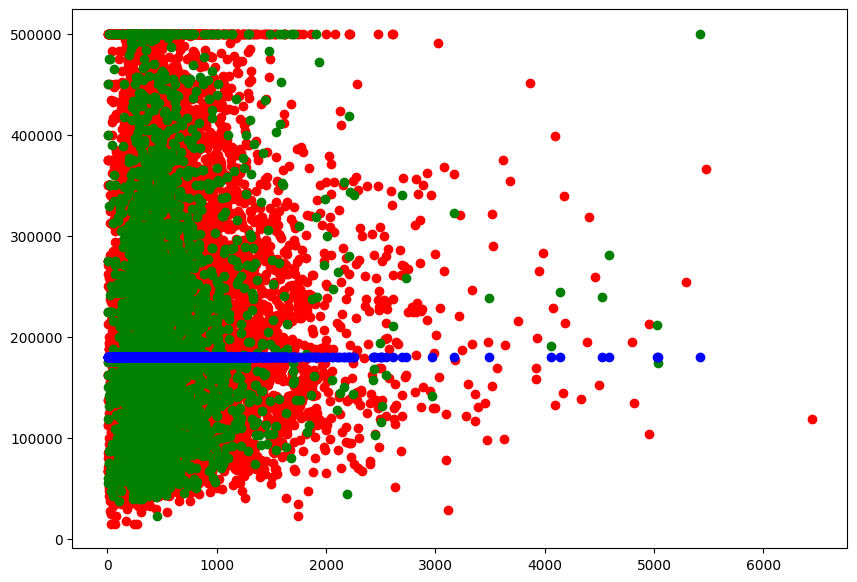

In [ ]:
plot_predictions(train_data=x_train, train_labels=y_train, test_data=x_test, test_label=y_test, predictions=y_pred)

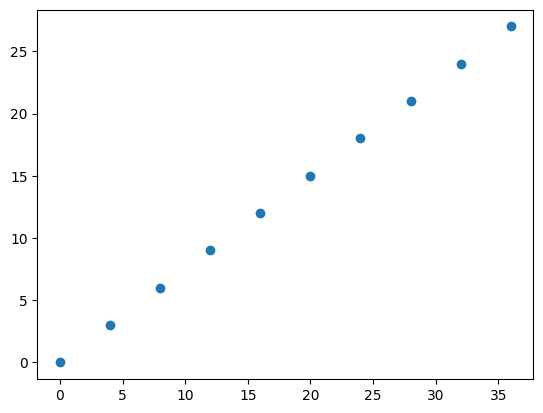

In [ ]:
x1_train = np.arange(0, 40, 4)
y1_train = np.arange(0, 30, 3)
x1_train, y1_train
plt.scatter(x1_train, y1_train)

In [ ]:
x1_test = np.arange(40, 60, 4)
y1_test= np.arange(30, 45, 3)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1)
])

model4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adamax(learning_rate=0.01),
    metrics=['mae']
)
x1_train = x1_train.reshape(-1, 1)
x1_test = x1_test.reshape(-1, 1)

model4.fit(x1_train, y1_train, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 613ms/step - loss: 16.4051 - mae: 16.4051
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 15.9556 - mae: 15.9556
Epoch 3/50
1/1 [==============================] - 0s 14ms/step - loss: 15.5105 - mae: 15.5105
Epoch 4/50
1/1 [==============================] - 0s 14ms/step - loss: 15.0691 - mae: 15.0691
Epoch 5/50
1/1 [==============================] - 0s 14ms/step - loss: 14.6312 - mae: 14.6312
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 14.1966 - mae: 14.1966
Epoch 7/50
1/1 [==============================] - 0s 16ms/step - loss: 13.7651 - mae: 13.7651
Epoch 8/50
1/1 [==============================] - 0s 13ms/step - loss: 13.3367 - mae: 13.3367
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 12.9113 - mae: 12.9113
Epoch 10/50
1/1 [==============================] - 0s 14ms/step - loss: 12.4886 - mae: 12.4886
Epoch 11/50
1/1 [==============================] - 0s 14ms

1/1 [==============================] - 0s 65ms/step


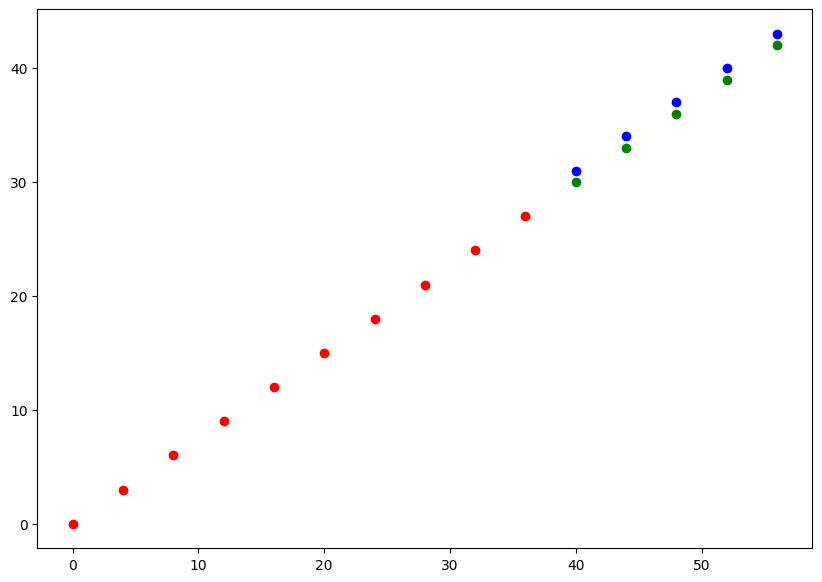

In [ ]:
model4.evaluate(x1_test, y1_test)

y1_pred = model4.predict(x1_test)
plot_predictions(x1_train, y1_train, x1_test, y1_test, y1_pred)